# Code for visualization

(0.0, 9.0)

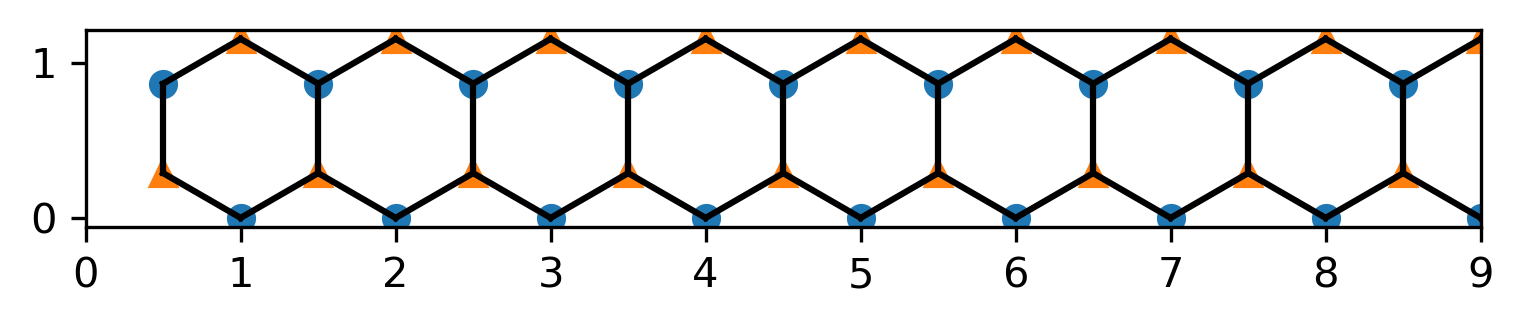

In [1]:
import tenpy 
from model_setup import *
import matplotlib.pyplot as plt

fig = plt.figure(dpi=300)
ax = fig.gca()

M = ribbon4('dummy')

# print(np.shape(M.lat.order))

M.lat.plot_sites(ax)
M.lat.plot_coupling(ax)

ax.set_aspect(1)
ax.set_xlim([0,9])

# Draft code for running DMRG

In [2]:
import tenpy 
from model_setup import *
import h5py

# <---------- 1) Generate initial state ---------->
M = ribbon4('clean')
print("Is MPO hermitian? ", M.H_MPO.is_hermitian())

# Geometry of ribbon: Lx = Lx+1, Ly = Ly*2
Lx = 31
Ly = 2
dope = 0
Nsites = int((Lx-1)*Ly*2 + Ly)


if dope == 0:
    prod_state = ['up','down'] * (Nsites//2)
else:
    prod_state = []
    for i in range(Nsites-dope):
        prod_state.append('up') if i%2 == 0 else prod_state.append('down')
    for i in range(dope):
        prod_state.append('full')


psi = MPS.from_product_state(M.lat.mps_sites(), prod_state)
data = {"psi": psi}
with h5py.File("mps_initial_L"+str(int(Lx-1))+"W"+str(int(Ly*2))+"_dope"+str(dope)+".h5", 'w') as f:
    tenpy.tools.hdf5_io.save_to_hdf5(f, data)


# <---------- 2) Run DMRG ---------->
# Set up parameters for simulation
simul_para = {'simulation_class': GroundStateSearch,

'output_filename': 'dmrg_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.h5',
'log_params': {'to_file': 'INFO', 'to_stdout': 'WARN'},
'save_every_x_seconds': 1000,
'save_resume_data': True,
'save_psi': True,  # don't save full wave function - less disk space, but can't resume/redo measurements!


'model_class':  ribbon4,
'model_params': {'type':'disorder'},

# Initial state setup
'initial_state_builder_class': InitialStateBuilder,
'initial_state_params':{'method': 'from_file','filename': 'mps_initial_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'.h5'},

# Setup DMRG parameters
'algorithm_class': TwoSiteDMRGEngine,
'algorithm_params':{
					'mixer': True, 
					'mixer_params': {'amplitude': 1.e-7, 'decay': 1.2, 'disable_after': 10},
					'trunc_params': {'svd_min': 1.e-6},
					'lanczos_params': {'N_min': 5, 'N_max': 10, 'reortho':True},
					'chi_list': {0: 200, 1: 400, 2: 800, 3: 1000, 8: 1200, 10: 1300, 12: 1400, 14: 1500, 15: 1600},
					'max_sweeps': 1},

}



# Run the simulation: Comment out "run_simulation" if we continue the DMRG run
#  by "resume_from_checkpoint"

tenpy.run_simulation(**simul_para)
# tenpy.resume_from_checkpoint(filename='dmrg_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.h5')



# <---------- 3) Extract important quantities ---------->


results = tenpy.tools.hdf5_io.load('dmrg_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.h5')
psi_test = results['psi']
psi_test.canonical_form()

sz = psi_test.expectation_value('Sz')
np.savetxt('sz_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.txt', sz)


ee = psi_test.entanglement_entropy()
np.savetxt('ee_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.txt', ee)

ntot = psi_test.expectation_value('Ntot')
np.savetxt('ntot_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_dope'+str(dope)+'_clean.txt' ,ntot)


Is MPO hermitian?  True

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


  warnings.warn(msg.format(keys=sorted(unused), name=self.name))



In [2]:
M = ribbon4()

Disorder terms are added!


In [2]:
Lx = 121
Ly = 2
U = 1
t = 1
gamma = 2
path = 'sites_impurity_L'+str(int(Lx-1))+'W'+str(int(Ly*2))+'_gamma'+str(gamma)+'.txt'


from os.path import exists

exists(path)

False